# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd
import os.path

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib notebook

# naložimo razpredelnico, s katero bomo delali
pot_do_filmov = os.path.join("../../02-zajem-podatkov","predavanja", "obdelani-podatki", "filmi.csv")
filmi = pd.read_csv(pot_do_filmov)

Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [5]:
filmi.sort_values(["ocena", "naslov"], ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
2734,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2293163,28341469.0,R,Two imprisoned men bond over a number of years...
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
5585,468569,Vitez teme,152,2008,9.0,84.0,2258200,534858444.0,PG-13,When the menace known as the Joker wreaks havo...
...,...,...,...,...,...,...,...,...,...,...
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."


Poberite stolpec ocen.

In [12]:
ocene = filmi["ocena"]
ocene

0       6.3
1       7.7
2       7.3
3       8.1
4       8.3
       ... 
9995    5.8
9996    6.3
9997    6.6
9998    7.3
9999    6.6
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [ ]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [14]:
zaokrozene = round(ocene)
zaokrozene

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    6.0
9997    7.0
9998    7.0
9999    7.0
Name: ocena, Length: 10000, dtype: float64

Vidimo, da zaokrozene ocene ustrezajo...

Dodajte zaokrožene vrednosti v podatke.

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [25]:
filmi["zaokrozena ocena"] = zaokrozene

In [31]:
filmi.sort_values("ocena").head(750).tail(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozena ocena
5593,470000,Wicked Little Things,94,2006,5.1,NaN,7941,NaN,R,"Karen, Sarah, and Emma Tunney are all moving t...",5.0
7821,1956620,Vroci posnetki,94,2014,5.1,36.0,106284,38543473.0,R,A married couple wake up to discover that the ...,5.0
7966,2091478,Air,95,2015,5.1,33.0,11603,NaN,PG-13,"In the near future, breathable air is nonexist...",5.0
5902,804507,La terza madre,102,2007,5.1,52.0,9292,58669.0,R,"Part three of the ""Three Mothers"" trilogy whic...",5.0
3742,184907,Snow Day,89,2000,5.1,34.0,11391,60020107.0,PG,When a school in upstate New York is snowed in...,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2072,98180,Red Scorpion,105,1988,5.2,NaN,8179,4192440.0,NaN,A Soviet Special Forces soldier is sent on a m...,5.0
9860,8179388,Rim of the World,98,2019,5.2,NaN,17884,NaN,NaN,Four misfit campers must band together and con...,5.0
4126,264150,Stevardese letijo v nebo,87,2003,5.2,27.0,25302,15589458.0,PG-13,A small-town woman tries to achieve her goal o...,5.0
1857,93857,Revenge of the Nerds II: Nerds in Paradise,88,1987,5.2,28.0,13180,30063289.0,NaN,The rising college nerds set out to a conventi...,5.0


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [33]:
mali_filmi = filmi[["naslov", "leto", "glasovi"]].copy()
mali_filmi["zaokrozene ocene"] = zaokrozene

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [41]:
prej_mask = filmi["leto"] < 1930
potem_mask = filmi["leto"] > 2017
dobra_ocena = filmi["ocena"] > 6.4
prej_ali_potem = (prej_mask | potem_mask) & dobra_ocena
izbrani_filmi = filmi[prej_ali_potem]
izbrani_filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozena ocena
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,107,1921,8.1,NaN,10158,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9990,10964430,Thappad,142,2020,6.9,NaN,13292,NaN,NaN,Thappad is a story of Amrita whose seemingly p...,7.0
9991,10993566,Miami Bici,98,2020,6.5,NaN,7864,NaN,NaN,"Miami Bici is the story of Ion and Ilie, two y...",6.0
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...,7.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [47]:
def kratki_naslovi(ime, max_besed=2):
    return len(ime.split()) <= max_besed

kratka_imena = filmi["naslov"].apply(kratki_naslovi)
res_dobri = filmi["ocena"] > 8
filmi[kratka_imena & res_dobri]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozena ocena
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,107,1921,8.1,NaN,10158,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
11,15324,Sherlock Jr.,45,1924,8.2,NaN,40303,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
13,15864,Zlata mrzlica,95,1925,8.2,NaN,98472,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
14,15881,Greed,140,1924,8.1,NaN,8940,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9898,8579674,1917,119,2019,8.3,78.0,375975,159227644.0,R,"April 6th, 1917. As a regiment assembles to wa...",8.0
9934,9052870,Chhichhore,143,2019,8.2,NaN,30459,898575.0,NaN,"A tragic incident forces Anirudh, a middle-age...",8.0
9957,9477520,Asuran,141,2019,8.5,NaN,8974,NaN,NaN,The teenage son of a farmer from an underprivi...,8.0
9971,9900782,Kaithi,145,2019,8.5,NaN,8741,NaN,NaN,A recently released prisoner becomes involved ...,8.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [53]:
filmi["zaokrozena ocena"] = zaokrozene
frekvenca_ocen = filmi.groupby("zaokrozena ocena").size()
frekvenca_ocen

zaokrozena ocena
1.0       5
2.0      40
3.0      56
4.0     221
5.0     829
6.0    3220
7.0    3534
8.0    2029
9.0      66
dtype: int64

Naredite stolpični diagram teh podatkov.

<IPython.core.display.Javascript object>


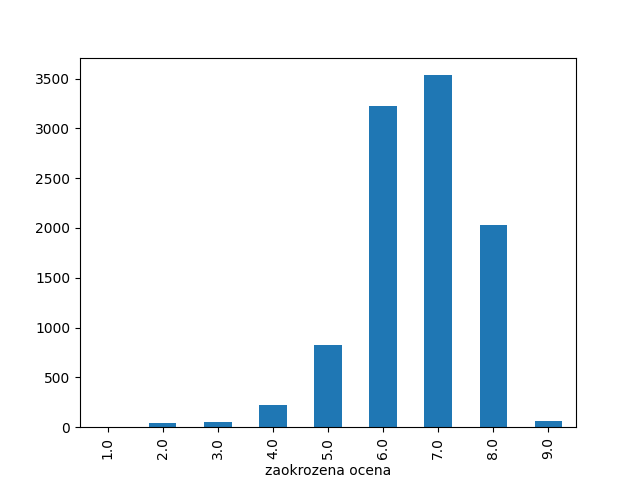

<AxesSubplot:xlabel='zaokrozena ocena'>

In [62]:
frekvenca_ocen.plot.bar()

In [61]:
avg = filmi.groupby("leto")["ocena"].mean()
avg.plot.bar()

<AxesSubplot:xlabel='leto'>

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

<IPython.core.display.Javascript object>


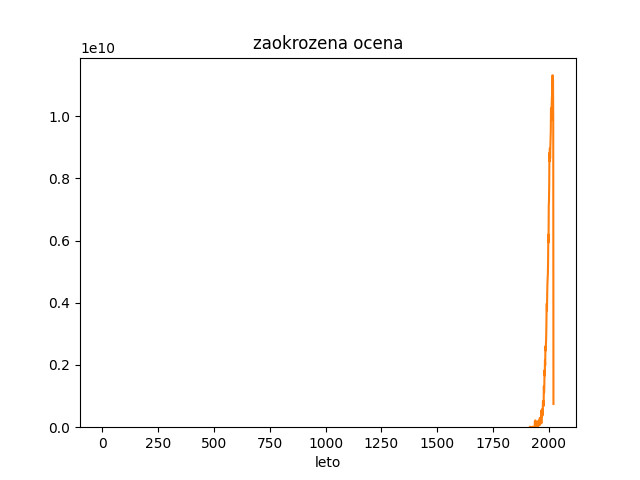

array([[<AxesSubplot:title={'center':'zaokrozena ocena'}>]], dtype=object)

In [72]:
filmi[["zaokrozena ocena"]].hist()

### Izris povprečne dolžine filma glede na leto

In [71]:
povp = filmi.groupby("leto")["dolzina"].mean()
povp.plot()

<AxesSubplot:title={'center':'zaokrozena ocena'}, xlabel='leto'>

### Izris skupnega zasluzka za posamezno leto

In [73]:
zas = filmi.groupby("leto")["zasluzek"].sum()
zas.plot()

<AxesSubplot:title={'center':'zaokrozena ocena'}, xlabel='leto'>